### Question 1

On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

a. Think about what could be going wrong with our calculation. Think about a better way to evaluate this data.   
b. What metric would you report for this dataset?   
c. What is its value?


#### Answer:   
a. By defination, average order value (AOV) is total revenue devided by the number of orders. It is widely used in evaluating online marketing performance and pricing strategy. Given sneakers is a relatively affordable item, it is not reasonable to see a AOV of \$3145.13. The potential problem is the dataset contains some large amount outliers, which may caused by fraud (shop 42, user 607) or other mistakes, such as price input typo (shop 78). 

A better way to evaluate this data is to calculate the AOV (mean of order amount) after removing the outliers, which is $302.58.

b. We could also use median as the metric to measure the central trend. Median is more robust for dataset with outliers. (This will be shown in below analysis)

c. The median of order amount is $284

Reference:    
https://www.shopify.ca/blog/average-order-value   
https://www.indeed.com/career-advice/career-development/customer-retention

### Please see below for the detailed analysis

In [1]:
## library & package
import os
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv(os.path.join(os.getcwd(), 'Shopify Data Science Intern Challenge Data Set.csv'))
data.shape

(5000, 7)

Dataset contains 5000 records and 7 columns

In [3]:
# print first few rows
data.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


We can tell all features are numeric except payment_method

In [4]:
# calculate the AOV = total revenue/number of orders
sum(data['order_amount'])/data['order_amount'].count()

3145.128

Given sneakers is a relatively affordable item, it is not reasonable to see a AOV of $3145.13.

### Explortary Data Analysis

#### Let's first check the duplicates and missing values in the dataset

In [5]:
# check duplicates
data.drop_duplicates().shape

(5000, 7)

Since the number of records are same before and after dropping duplicates, it means there is no duplicates

In [6]:
# check missing value
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   order_id        5000 non-null   int64 
 1   shop_id         5000 non-null   int64 
 2   user_id         5000 non-null   int64 
 3   order_amount    5000 non-null   int64 
 4   total_items     5000 non-null   int64 
 5   payment_method  5000 non-null   object
 6   created_at      5000 non-null   object
dtypes: int64(5), object(2)
memory usage: 273.6+ KB


The number of non-missing value equals the number of records. Thus, there is no missing values

#### Let's investigate the reason of unreasonable AOV

In [7]:
# Use describe() function to check the distribution of numeric features
data.describe().astype(int)

,order_id,shop_id,user_id,order_amount,total_items
count,5000,5000,5000,5000,5000
mean,2500,50,849,3145,8
std,1443,29,87,41282,116
min,1,1,607,90,1
25%,1250,24,775,163,1
50%,2500,50,849,284,2
75%,3750,75,925,390,3
max,5000,100,999,704000,2000


We could also visualize the distribution of order amount with histogram and boxplot

Text(0.5, 1.0, 'Order Amount Distribution')

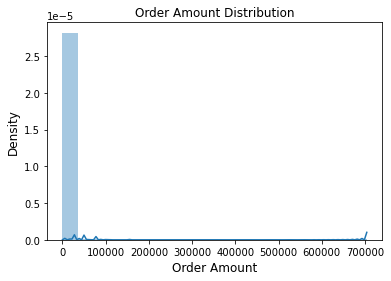

In [8]:
ax = sns.distplot(data['order_amount'], hist=True, bins=20)
ax.set_xlabel('Order Amount', fontsize=12)
ax.set_ylabel('Density', fontsize=12)
ax.set_title('Order Amount Distribution', fontsize=12)

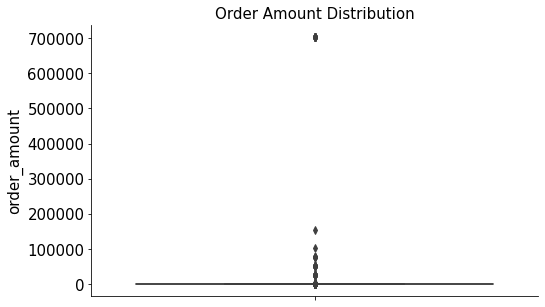

In [9]:
fig, ax1= plt.subplots(figsize=(8,5))
sns.boxplot(y='order_amount', data=data, ax=ax1)
ax1.set_ylabel('order_amount', fontsize=15)
ax1.set_title('Order Amount Distribution', fontsize=15)
ax1.tick_params(labelsize=15)
sns.despine()

#### Based on the table and plots, we could tell that the distribution of the order_amount is quite skewed, with relatively large standard deviance 41282. The order_amount column includes large outliers (\\$704,000). This amount is relatively large to most order amounts, which make the box of boxplot extremely narrow. Thinking from reality, an order of sneakers of \\$704000 is rarely happened.

#### Let's look at the records with order_amount=$704000

In [10]:
data[data['order_amount']==704000]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00
520,521,42,607,704000,2000,credit_card,2017-03-02 4:00:00
1104,1105,42,607,704000,2000,credit_card,2017-03-24 4:00:00
1362,1363,42,607,704000,2000,credit_card,2017-03-15 4:00:00
1436,1437,42,607,704000,2000,credit_card,2017-03-11 4:00:00
1562,1563,42,607,704000,2000,credit_card,2017-03-19 4:00:00
1602,1603,42,607,704000,2000,credit_card,2017-03-17 4:00:00
2153,2154,42,607,704000,2000,credit_card,2017-03-12 4:00:00
2297,2298,42,607,704000,2000,credit_card,2017-03-07 4:00:00


#### We could tell that all orders with $704,000 contains 2000 items and happened at the exact same time (4:00:00) on different date (some even in the same day) with same user_id 607, and same shop_id 42. All payment method is credit card. These orders have highly potential to be frauds. 

In [11]:
# lets' check total_items columns
data['total_items'].value_counts()

2       1832
1       1830
3        941
4        293
5         77
2000      17
6          9
8          1
Name: total_items, dtype: int64

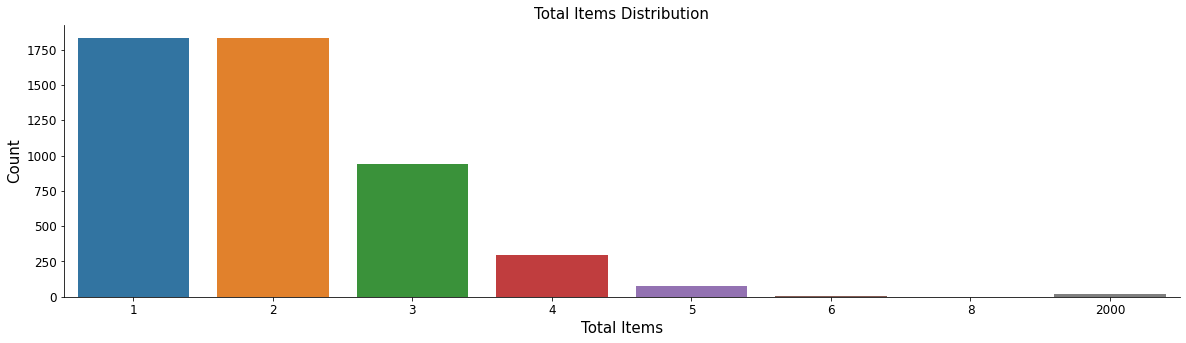

In [12]:
fig, ax1 = plt.subplots(figsize=(20,5))
sns.countplot(x = 'total_items', data = data, ax = ax1)
ax1.set_xlabel('Total Items', fontsize=15)
ax1.set_ylabel('Count', fontsize=15)
ax1.set_title('Total Items Distribution', fontsize=15)
ax1.tick_params(labelsize=12)
sns.despine()

Except the order with 2000 items, all other amounts of total_items in an order are in reasonable range from 1-8

#### Next, let's look at the unit price (order_amount divided by total_items)

In [13]:
data['unit_price'] = data['order_amount']/data['total_items']

In [14]:
data['unit_price'].describe()

count     5000.000000
mean       387.742800
std       2441.963725
min         90.000000
25%        133.000000
50%        153.000000
75%        169.000000
max      25725.000000
Name: unit_price, dtype: float64

Text(0.5, 1.0, 'Unit Price Distribution')

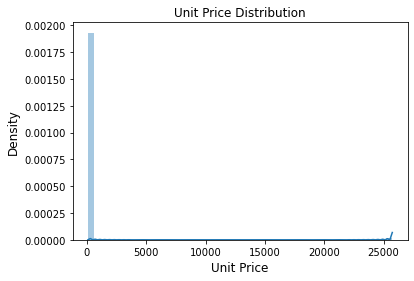

In [15]:
ax = sns.distplot(data['unit_price'], hist=True)
ax.set_xlabel('Unit Price', fontsize=12)
ax.set_ylabel('Density', fontsize=12)
ax.set_title('Unit Price Distribution', fontsize=12)

#### We could tell that there is an outlier of unit price ($25725 per shoes). It is not reasonable for affordable sneakers. 

In [16]:
data[data['unit_price']==25725]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,unit_price
160,161,78,990,25725,1,credit_card,2017-03-12 5:56:57,25725.0
490,491,78,936,51450,2,debit,2017-03-26 17:08:19,25725.0
493,494,78,983,51450,2,cash,2017-03-16 21:39:35,25725.0
511,512,78,967,51450,2,cash,2017-03-09 7:23:14,25725.0
617,618,78,760,51450,2,cash,2017-03-18 11:18:42,25725.0
691,692,78,878,154350,6,debit,2017-03-27 22:51:43,25725.0
1056,1057,78,800,25725,1,debit,2017-03-15 10:16:45,25725.0
1193,1194,78,944,25725,1,debit,2017-03-16 16:38:26,25725.0
1204,1205,78,970,25725,1,credit_card,2017-03-17 22:32:21,25725.0
1259,1260,78,775,77175,3,credit_card,2017-03-27 9:27:20,25725.0


#### If we look at all records with unit price $25725, we could tell that they all bought from shop 78. The sneakers are bought by different users with different payment_method. It also include cash payment, which has less probability of fraud. However, this is still suspicious. It may caused by price input typo in the system. More investigate may take with shop 78.

In [17]:
data['unit_price'][data['unit_price']!=25725].describe()

count    4954.000000
mean      152.475575
std        31.260218
min        90.000000
25%       132.000000
50%       153.000000
75%       168.000000
max       352.000000
Name: unit_price, dtype: float64

If we remove the outliers, all other records have reasonable unit price.

Text(0.5, 1.0, 'Unit Price Distribution without outliers')

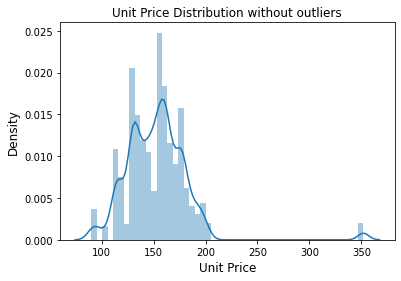

In [18]:
ax = sns.distplot(data['unit_price'][data['unit_price']!=25725], hist=True)
ax.set_xlabel('Unit Price', fontsize=12)
ax.set_ylabel('Density', fontsize=12)
ax.set_title('Unit Price Distribution without outliers', fontsize=12)

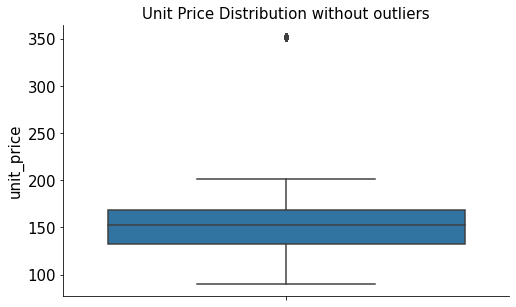

In [19]:
fig, ax1= plt.subplots(figsize=(8,5))
sns.boxplot(y='unit_price', data=data[data['unit_price']!=25725], ax=ax1)
ax1.set_ylabel('unit_price', fontsize=15)
ax1.set_title('Unit Price Distribution without outliers', fontsize=15)
ax1.tick_params(labelsize=15)
sns.despine()

Once we remove the outlier, the unit price distribution looks more normal. It shows a bell shape in the histogram. We can witness an outlier in the boxplot. Currently, the maximum unit price is $352. Even it is still relatively large, this unit price is possible. For example, it could be limited edition or high-end sneakers.

#### Thus, a better way to evaluate the data is too remove the outliers and calculate AOV again

In [20]:
cleaned_data = data[data['unit_price']!=25725]
cleaned_data = cleaned_data[cleaned_data['order_amount']!=704000]

In [21]:
cleaned_data.describe()

,order_id,shop_id,user_id,order_amount,total_items,unit_price
count,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000
mean,2499.551347,49.846465,849.752279,302.580514,1.994734,151.788536
std,1444.069407,29.061131,86.840313,160.804912,0.982821,29.034215
min,1.000000,1.000000,700.000000,90.000000,1.000000,90.000000
25%,1248.000000,24.000000,775.000000,163.000000,1.000000,132.000000
50%,2497.000000,50.000000,850.000000,284.000000,2.000000,153.000000
75%,3751.000000,74.000000,925.000000,387.000000,3.000000,166.000000
max,5000.000000,100.000000,999.000000,1760.000000,8.000000,352.000000


In [22]:
sum(cleaned_data['order_amount'])/cleaned_data['order_amount'].count()

302.58051448247926

#### Now, the average order value (AOV) for cleaned data is $302.58

#### We could use median as the metric

In [23]:
data['order_amount'].median()

284.0

In [24]:
cleaned_data['order_amount'].median()

284.0

#### We can tell that before and after removing the outliers, the median of order amount ($284) of the order amount is same. Thus, median is a robust metric.

### Question 2: 
For this question you’ll need to use SQL. Follow this link to access the data set required for the challenge. Please use queries to answer the following questions. Paste your queries along with your final numerical answers below.

a. How many orders were shipped by Speedy Express in total?   
b. What is the last name of the employee with the most orders?    
c. What product was ordered the most by customers in Germany?   


#### Answer

#### a.
SELECT COUNT(*) AS Orders    
FROM [Orders] AS o    
INNER JOIN Shippers AS s ON o.ShipperID = s.ShipperID   
WHERE ShipperName = "Speedy Express";

#### There are 54 orders shipped by Speedy Expresss in total.   
Idea of solving the problem:   
Order and Shippers information stored in Orders and Shippers tables respectively. First, join two tables by their primary key ShippersID. Then, count all orders with Speedy Express.

#### b.  
SELECT e.LastName, COUNT(*) AS Orders   
FROM [Employees] AS e   
INNER JOIN [Orders] AS o ON e.EmployeeID = o.EmployeeID   
GROUP BY e.EmployeeID    
ORDER BY COUNT(*) DESC   
LIMIT 1;

#### The last name of the employee with the most orders is Peacock (with 40 orders).    
Idea of solving the problem:   
Order and Employee information stored in Orders and Employees tables respectively. First, join two tables by their primary key EmployeeID. Then, we need to count the orders each employee have. We use group by employee ID to achieve that. Third, we need sort in descending order so that the first records will be the employee with the most order. We select LastName column to get the name.

#### c. 
SELECT p.ProductName, SUM(od.Quantity) AS MostOrderedQuantity  
FROM [Products] AS p   
INNER JOIN [OrderDetails] AS od ON p.ProductID = od.ProductID  
INNER JOIN [Orders] AS o ON od.OrderID = o.OrderID  
INNER JOIN [Customers] AS c ON o.CustomerID = c.CustomerID  
WHERE c.Country = "Germany"  
GROUP BY p.ProductName  
ORDER BY SUM(od.Quantity) DESC   
LIMIT 1;

##### Boston Crab Meat was ordered the most (160 times) by Germany Customers    
Idea of solving the problem:    
Product order amount and customer country information stored in Products and Customers tables respectively. However, they do not have the common column to join 2 tables. We need to find the connection between those 2. Thus, we first connect 4 tables: Products, OrderDetails, Orders and Customers by common key ID. Then, we select country=Germany since we are only interested in Germany customers. Next, we count all the quantity ordered for each product and sort in descending order. The product ordered most by Germeny customers is the first record. We select the product name to get the answer.

#### Thanks for your patience of going through the analysis!!